# Which Neighborhood in Pittsburgh is the Safest?

## By Group 30: Steven Zheng and Valerie Schaible

**Introduction:**
    While Pitt offers beautiful dorm halls as on-campus housing options, many Pitt students opt to live off-campus after their freshman year. Because this may be their first time living without their parents or the rigorous structure of the dorms, a big factor in determing their new home is finding a place they can feel safe. We thought Pitt students might be interested to see which neighborhoods are the safest/least safe in the city of Pittsburgh before they go hunting for housing.

**Our Metric: Overall Safety**

We decided to measure this metric based on three things:
1. Police Incidents Per Neighborhood
2. Non-Traffic Citations Per Neighborhood
3. Fire Incidents Per Neighborhood
        
        
        
We used three datasets for this analysis:

1. [Police Incident Blotter](https://data.wprdc.org/datastore/dump/1797ead8-8262-41cc-9099-cbc8a161924b)
   We used this dataset to analyze the number of police incidents per neighborhood.
  
2. [Citations](https://data.wprdc.org/datastore/dump/6b11e87d-1216-463d-bbd3-37460e539d86)
   We used this dataset to analyze the number/severity of citations per nieghborhood.
    
3. [Fire Incidents](https://data.wprdc.org/datastore/dump/8d76ac6b-5ae8-4428-82a4-043130d17b02)
   We used this dataset to analyze the number of fire incidents per neighborhood.

# Metric #1 Number of Citations Per Neighborhood

**Analyzed by Valerie Schaible**

Citations in Pittsburgh are low level crimes, including harrasment, disorderly conduct, and more, in which law enforcement opts to issue a citation or fine instead of arresting the perpetartor. This datasets contains all the non-traffic citations in Pittsburgh. We are including these citations as a metric because even though they are not on the same level as the police incidents, they can definitely contribute to a lack of personal saefty in any given neighborhood.

In [1]:
import geopandas as gpd
import pandas as pd

# Load in the citations
citations= gpd.read_file('Citations.csv')

citations.head(3)

,PK,CCR,GENDER,RACE,AGE,CITEDTIME,INCIDENTLOCATION,OFFENSES,NEIGHBORHOOD,ZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y,geometry
0,1078081,16157849,M,B,29,2016-08-22T23:45:00,"200 Block N DITHRIDGE ST PITTSBURGH, PA",5503(a)(2) DISORDERLY CONDUCT - UNREASONABLE N...,North Oakland,4,507,8,3,-79.95169208,40.44931132,None
1,1078082,16157849,M,W,21,2016-08-22T23:45:00,"200 Block N DITHRIDGE ST PITTSBURGH, PA",5503(a)(2) DISORDERLY CONDUCT - UNREASONABLE N...,North Oakland,4,507,8,3,-79.95169208,40.44931132,None
2,1078083,16159579,,,,2016-08-25T11:10:00,"NORTH PARK PITTSBURGH, PA",5505 Public Drunkenness,Allegheny Center,1,2204,,,,,None


We can see that the dataset provides a description of the offense, with examples such as disorderly conduct the includes the destrcution of another's property, public drunkeness, and scattering dangerous waste into public spaces and waters. The dataset doesn't have a set hierarchy, but we can classify certain citations as "most likely to cause harm to other individuals."

The first severe citation we can analyze is the offense labeled : "5503(a)(4) DISORDERLY CONDUCT-HAZARDOUS/PHYS.OFF"

In [2]:
hazards=gpd.read_file('Citations.csv')
#sort dataset to only include citations with this offense
hazards=hazards[hazards["OFFENSES"] == "5503(a)(4) DISORDERLY CONDUCT - HAZARDOUS/PHYS. OFF"]

hazards.head(3)

,PK,CCR,GENDER,RACE,AGE,CITEDTIME,INCIDENTLOCATION,OFFENSES,NEIGHBORHOOD,ZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y,geometry
15,1078043,16048495,M,W,27,2016-03-18T00:50:00,"1500 Block E CARSON ST PITTSBURGH, PA",5503(a)(4) DISORDERLY CONDUCT - HAZARDOUS/PHYS...,South Side Flats,3,1702,3,3,-79.98330671,40.42868483,None
23,1078051,16053250,F,B,26,2016-03-25T01:55:00,"WEST LIBERTY AV & PIONEER AV PITTSBURGH, PA",5503(a)(4) DISORDERLY CONDUCT - HAZARDOUS/PHYS...,Brookline,6,1917,4,5,-80.01011991,40.41291213,None
64,1077859,16148744,M,W,45,2016-08-10T03:30:00,"7TH STREET BRIDGE PITTSBURGH, PA",5503(a)(4) DISORDERLY CONDUCT - HAZARDOUS/PHYS...,Golden Triangle/Civic Arena,2,201,2,5,-80.05910627,40.42937714,None


Now we can determine which neighborhoods have the highest numbers of this specific citation.

In [3]:
temp = pd.DataFrame(columns = ["Neighborhood" ,"Number of 5503(a)(4) Offenses"])
temp["Neighborhood"] = hazards["NEIGHBORHOOD"]
temp["Number of 5503(a)(4) Offenses"]=0

temp.head(3)


,Neighborhood,Number of 5503(a)(4) Offenses
15,South Side Flats,0
23,Brookline,0
64,Golden Triangle/Civic Arena,0


In [4]:
temp_agg = pd.DataFrame(columns = ["Neighborhood", "Number of 5503(a)(4) Offenses"])
for i, row in temp.iterrows():
    neighborhood = row["Neighborhood"]
 # Check to see if the neighborhood is already been acremented
        #If so, increment the number of citations in that neighborhood
    if neighborhood in temp_agg["Neighborhood"].values:
            temp_agg.loc[temp_agg["Neighborhood"] == neighborhood, "Number of 5503(a)(4) Offenses"] += 1
    else:
        # If not, add a new row to the aggregated DataFrame
            agg_new_row = pd.DataFrame({ 'Neighborhood': [neighborhood], 'Number of 5503(a)(4) Offenses': [1] })
            temp_agg = pd.concat([temp_agg, agg_new_row])
temp_agg.head(3)

,Neighborhood,Number of 5503(a)(4) Offenses
0,South Side Flats,146
0,Brookline,18
0,Golden Triangle/Civic Arena,2


In [5]:
temp_agg_sorted= temp_agg.sort_values("Number of 5503(a)(4) Offenses", ascending=False)
temp_agg_sorted.head(5)

,Neighborhood,Number of 5503(a)(4) Offenses
0,South Side Flats,146
0,Central Business District,100
0,North Shore,51
0,Central Oakland,34
0,Shadyside,28


We can see that South Side Flats has the highest number of occurences of this specific citation. Lets plot the top ten neighborhoods.

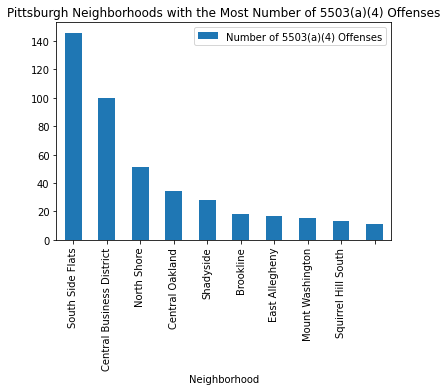

In [6]:
plt = temp_agg_sorted.iloc[:10].plot(kind='bar', x="Neighborhood", y="Number of 5503(a)(4) Offenses", title="Pittsburgh Neighborhoods with the Most Number of 5503(a)(4) Offenses")

Lets also plot the neighborhoods with the least number of occurences of this offense.

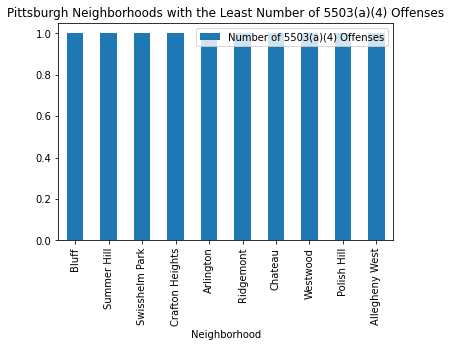

In [7]:
temp_agg_sorted_opp=temp_agg.sort_values("Number of 5503(a)(4) Offenses", ascending=True)
plt = temp_agg_sorted_opp.iloc[:10].plot(kind='bar', x="Neighborhood", y="Number of 5503(a)(4) Offenses", title="Pittsburgh Neighborhoods with the Least Number of 5503(a)(4) Offenses")

Lets repeat this process with the next severe offense.

In [13]:
mischief=gpd.read_file('Citations.csv')
#sort dataset to only include citations with this offense
mischief=mischief[mischief["OFFENSES"] == "3304(a)(5) CRIMINAL MISCHIEF - Intentionally Damages Real Or Personal Property Of Another"]

mischief.head(3)


,PK,CCR,GENDER,RACE,AGE,CITEDTIME,INCIDENTLOCATION,OFFENSES,NEIGHBORHOOD,ZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y,geometry
9,1078090,16077700,M,B,24,2016-04-29T01:05:00,"80 Block S 15TH ST PITTSBURGH, PA",3304(a)(5) CRIMINAL MISCHIEF - Intentionally D...,South Side Flats,3,1702,3,3,-79.98357299,40.4285553,None
50,1077845,16154922,M,W,58,2016-08-18T20:05:00,"200 Block S FAIRMOUNT ST PITTSBURGH, PA",3304(a)(5) CRIMINAL MISCHIEF - Intentionally D...,Friendship,5,807,7,2,-79.93380359,40.46232738,None
59,1077854,16153732,F,B,27,2016-08-17T06:08:00,"2400 Block PARK HILL DR PITTSBURGH, PA",3304(a)(5) CRIMINAL MISCHIEF - Intentionally D...,East Hills,5,1306,9,2,-79.87380288,40.45582712,None


In [14]:
temp2 = pd.DataFrame(columns = ["Neighborhood" ,"Number of Mischief Offenses"])
temp2["Neighborhood"] = mischief["NEIGHBORHOOD"]
temp2["Number of Mischief Offenses"]=0

temp2.head(3)

,Neighborhood,Number of Mischief Offenses
9,South Side Flats,0
50,Friendship,0
59,East Hills,0


In [15]:
temp2_agg = pd.DataFrame(columns = ["Neighborhood", "Number of Mischief Offenses"])
for i, row in temp2.iterrows():
    neighborhood = row["Neighborhood"]
 # Check to see if the neighborhood is already been acremented
        #If so, increment the number of citations in that neighborhood
    if neighborhood in temp2_agg["Neighborhood"].values:
            temp2_agg.loc[temp2_agg["Neighborhood"] == neighborhood, "Number of Mischief Offenses"] += 1
    else:
        # If not, add a new row to the aggregated DataFrame
            agg_new_row = pd.DataFrame({ 'Neighborhood': [neighborhood], 'Number of Mischief Offenses': [1] })
            temp2_agg = pd.concat([temp2_agg, agg_new_row])
temp2_agg.head(3)

,Neighborhood,Number of Mischief Offenses
0,South Side Flats,44
0,Friendship,1
0,East Hills,8


In [16]:
temp2_agg_sorted= temp2_agg.sort_values("Number of Mischief Offenses", ascending=False)
temp2_agg_sorted.head(5)

,Neighborhood,Number of Mischief Offenses
0,South Side Flats,44
0,Central Business District,32
0,Carrick,25
0,Hazelwood,21
0,Knoxville,15


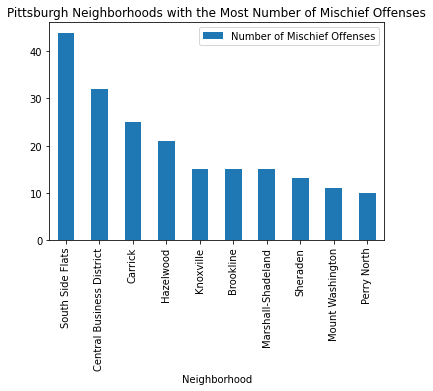

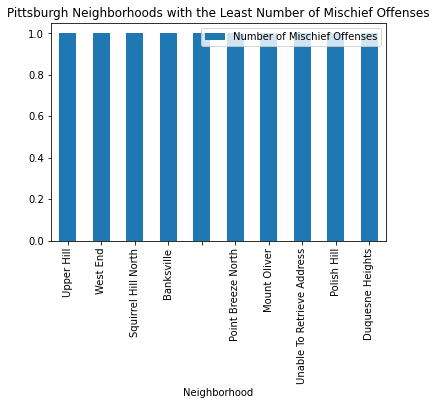

In [17]:
plt = temp2_agg_sorted.iloc[:10].plot(kind='bar', x="Neighborhood", y="Number of Mischief Offenses", title="Pittsburgh Neighborhoods with the Most Number of Mischief Offenses")
temp2_agg_sorted_opp=temp2_agg.sort_values("Number of Mischief Offenses", ascending=True)
plt = temp2_agg_sorted_opp.iloc[:10].plot(kind='bar', x="Neighborhood", y="Number of Mischief Offenses", title="Pittsburgh Neighborhoods with the Least Number of Mischief Offenses")

We can see that South Side Flats has the highest number of occurences of the criminal mischief citation, while the bottom ten neighborhoods all have only one instance of this offense.

Finally, lets do this process one more time for the citation that is harrassment by threats or physicality.

In [18]:
threats=gpd.read_file('Citations.csv')
#sort dataset to only include citations with this offense
threats=threats[threats["OFFENSES"] == "2709(a)(1) Harassment by Physical Contact, or Attempts or Threats"]

threats.head(3)

,PK,CCR,GENDER,RACE,AGE,CITEDTIME,INCIDENTLOCATION,OFFENSES,NEIGHBORHOOD,ZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y,geometry
51,1077846,16149855,F,B,30,2016-08-10T11:00:00,"300 Block CLOVER ST PITTSBURGH, PA","2709(a)(1) Harassment by Physical Contact, or ...",Arlington,3,1603,3,3,-79.97202395,40.41473751,None
69,1077864,16128942,M,W,51,2016-07-11T21:10:00,"1900 Block E CARSON ST PITTSBURGH, PA","2709(a)(1) Harassment by Physical Contact, or ...",South Side Flats,3,1702,3,3,-79.97896499,40.42846581,None
140,1078134,16167457,F,B,25,2016-09-05T16:25:00,"NORTH SHORE DR & ART ROONEY AV PITTSBURGH, PA","2709(a)(1) Harassment by Physical Contact, or ...",North Shore,1,2205,1,6,-80.01355472,40.44529938,None


In [19]:
temp3 = pd.DataFrame(columns = ["Neighborhood" ,"Number of Harassment/Physical Offenses"])
temp3["Neighborhood"] = threats["NEIGHBORHOOD"]
temp3["Number of Harassment/Physical Offenses"]=0

temp3.head(3)

,Neighborhood,Number of Harassment/Physical Offenses
51,Arlington,0
69,South Side Flats,0
140,North Shore,0


In [20]:
temp3_agg = pd.DataFrame(columns = ["Neighborhood", "Number of Harassment/Physical Offenses"])
for i, row in temp3.iterrows():
    neighborhood = row["Neighborhood"]
 # Check to see if the neighborhood is already been acremented
        #If so, increment the number of citations in that neighborhood
    if neighborhood in temp3_agg["Neighborhood"].values:
            temp3_agg.loc[temp3_agg["Neighborhood"] == neighborhood, "Number of Harassment/Physical Offenses"] += 1
    else:
        # If not, add a new row to the aggregated DataFrame
            agg_new_row = pd.DataFrame({ 'Neighborhood': [neighborhood], 'Number of Harassment/Physical Offenses': [1] })
            temp3_agg = pd.concat([temp3_agg, agg_new_row])
temp3_agg.head(3)

,Neighborhood,Number of Harassment/Physical Offenses
0,Arlington,17
0,South Side Flats,72
0,North Shore,31


In [21]:
temp3_agg_sorted= temp3_agg.sort_values("Number of Harassment/Physical Offenses", ascending=False)
temp3_agg_sorted.head(5)

,Neighborhood,Number of Harassment/Physical Offenses
0,Central Business District,165
0,South Side Flats,72
0,Brookline,55
0,Carrick,48
0,Sheraden,44


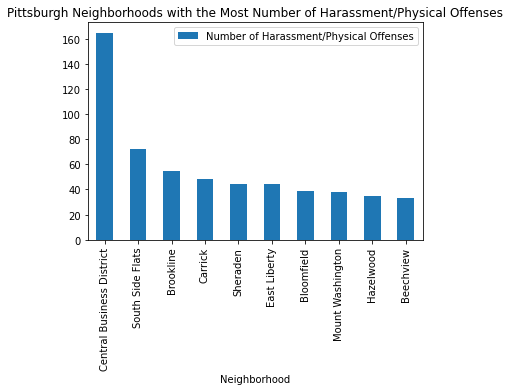

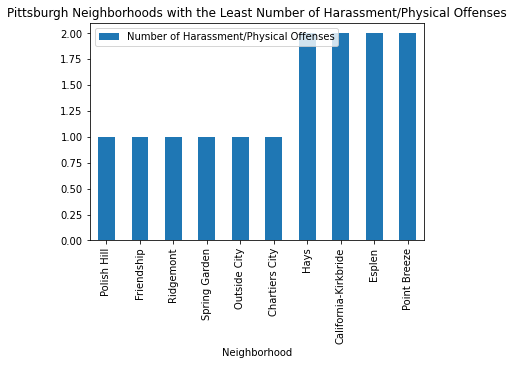

In [22]:
plt = temp3_agg_sorted.iloc[:10].plot(kind='bar', x="Neighborhood", y="Number of Harassment/Physical Offenses", title="Pittsburgh Neighborhoods with the Most Number of Harassment/Physical Offenses")
temp3_agg_sorted_opp=temp3_agg.sort_values("Number of Harassment/Physical Offenses", ascending=True)
plt = temp3_agg_sorted_opp.iloc[:10].plot(kind='bar', x="Neighborhood", y="Number of Harassment/Physical Offenses", title="Pittsburgh Neighborhoods with the Least Number of Harassment/Physical Offenses")

Based on these graphs, we can see that the neighborhood with the most number of harassment/physical offenses to occur is Central Business District, with South Side Flats being second. And the bottom ten neighborhoods for occurences of this citation are ranging from 1-2 instances, starting at Polish Hill with 1.

Overall, the two neighborhoods who appear to be in the top two places for all three analyzed citations are South Side Flats and Central Business District.

In [32]:
temp_agg.query('Neighborhood.str.startswith("Mt. Oliver Neighborhood")')

,Neighborhood,Number of 5503(a)(4) Offenses


In [31]:
temp2_agg.query('Neighborhood.str.startswith("Mt. Oliver Neighborhood")')

,Neighborhood,Number of Mischief Offenses


In [30]:
temp3_agg.query('Neighborhood.str.startswith("Mt. Oliver Neighborhood")')

,Neighborhood,Number of Harassment/Physical Offenses


In [33]:
citations.query('NEIGHBORHOOD.str.startswith("Mt. Oliver Neighborhood")')

,PK,CCR,GENDER,RACE,AGE,CITEDTIME,INCIDENTLOCATION,OFFENSES,NEIGHBORHOOD,ZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y,geometry
399,1078422,16179446,M,W,70,2016-09-20T15:30:00,"400 Block ST JOSEPH ST PITTSBURGH, PA",5511(c)(1) CRUELTY TO ANIMALS,Mt. Oliver Neighborhood,3,1607,3,3,-79.9817219,40.41341126,None
400,1078423,16179446,M,W,70,2016-09-22T12:00:00,"400 Block ST JOSEPH ST PITTSBURGH, PA",633.02(a) Dog License Required; 3 Months or Older,Mt. Oliver Neighborhood,3,1607,3,3,-79.9817219,40.41341126,None
401,1078424,16179446,M,W,70,2016-09-22T12:00:00,"400 Block ST JOSEPH ST PITTSBURGH, PA",633.05 Rabies Vaccination,Mt. Oliver Neighborhood,3,1607,3,3,-79.9817219,40.41341126,None
402,1078425,16179446,M,W,70,2016-09-22T06:00:00,"400 Block ST JOSEPH ST PITTSBURGH, PA",633.09(a) Harboring a Nuisance; Any animal to ...,Mt. Oliver Neighborhood,3,1607,3,3,-79.9817219,40.41341126,None


This shows us that Mt. Oliver only has 4 citations occur in this neighborhood, and none of them were in the top three most severe.

# Metric #2: Number of Police Incidents Per NeighborHood

**Analyzed by Valerie Schaible**

In [2]:
import geopandas as gpd
import pandas as pd

# Load in the police incidents
police_incidents= gpd.read_file('Police_Incidents.csv')

police_incidents.head(3)

ModuleNotFoundError: No module named 'geopandas'

This dataset shows all police incidents in Pittsburgh neighborhoods in the last 30 days, as well as categorizing them based on a hierarchy of threat/danger associated with the incident. We can now analyze this dataset to see which neighborhood has the most incidents, and which neighborhood has the most incidents that are highest in the heirarchy.

In [35]:
incidents = pd.DataFrame(columns = ["Neighborhood", "Number of Incidents"])
incidents["Neighborhood"] = police_incidents["INCIDENTNEIGHBORHOOD"]
incidents["Number of Incidents"] = 0

incidents.head(3)

,Neighborhood,Number of Incidents
0,North Shore,0
1,Upper Lawrenceville,0
2,Northview Heights,0


Now we can iterate through incidents to calculate the number of incidents in each neighborhood, by creating a new pandas dataset that ignores the repeats of neighborhoods in the incidents datatset, by increasing the number of incidents per neighborhood whenever it appears more than once in the incidents dataset.

In [36]:
incidents_agg = pd.DataFrame(columns = ["Neighborhood", "Number of Incidents"])
for Neighborhood in incidents["Neighborhood"]:
    # Check if this neighborhood has already been aggregated
    if Neighborhood in incidents_agg["Neighborhood"].values:
        # If so, increment the number of incidents in that neighborhood
        incidents_agg.loc[incidents_agg["Neighborhood"] == Neighborhood, "Number of Incidents"] += 1
    else:
        # If not, add a new row to the aggregated DataFrame
        agg_new_row = pd.DataFrame({ 'Neighborhood': [Neighborhood], 'Number of Incidents': [1] })
        incidents_agg = pd.concat([incidents_agg, agg_new_row])

       

     
incidents_agg.head(3)


,Neighborhood,Number of Incidents
0,North Shore,3424
0,Upper Lawrenceville,1529
0,Northview Heights,2462


Now we can sort the neighborhoods by number of incidents, in descending order, to see which neighborhood has the most incidents.

In [37]:
incidents_sorted = incidents_agg.sort_values("Number of Incidents", ascending=False)

incidents_sorted.head(5)

,Neighborhood,Number of Incidents
0,South Side Flats,17627
0,Central Business District,17353
0,Carrick,10945
0,Bloomfield,8150
0,Shadyside,8038


We can see that South Side Flats has the most police incidents occur. Our next step is to sort the dataset by number of incidents in ascending order, to see which neighborhoods have the least number of incidents, and are arguably safer.

In [38]:
incidents_sorted_opp = incidents_agg.sort_values("Number of Incidents", ascending=True)

incidents_sorted_opp.head(5)

,Neighborhood,Number of Incidents
0,Mt. Oliver Boro,94
0,Mt. Oliver Neighborhood,117
0,Outside County,226
0,Troy Hill-Herrs Island,252
0,Ridgemont,282


We can see that Mt. Oliver Boro had the least number of incidents, at 94 in the last 30 days. Lets plot the ten neighborhoods with the most incidents, and then the ten neighborhoods with the least incidents. 

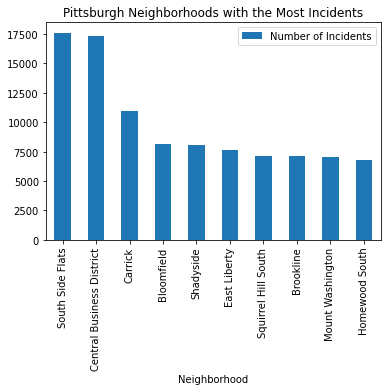

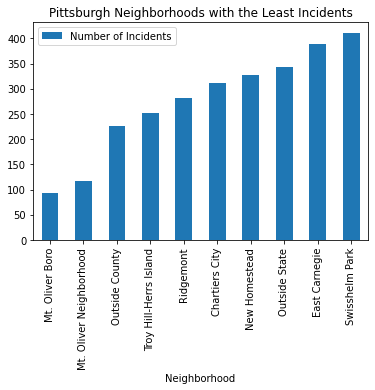

In [39]:
plt = incidents_sorted.iloc[:10].plot(kind='bar', x="Neighborhood", y="Number of Incidents", title="Pittsburgh Neighborhoods with the Most Incidents")
plt = incidents_sorted_opp.iloc[:10].plot(kind='bar', x="Neighborhood", y="Number of Incidents", title="Pittsburgh Neighborhoods with the Least Incidents")

We can see that the top two: South Side Flats and Central Business District appear to be upper level outliers, and the next 8 appear to decrease in an almost linear rate. Furthermore the bottom two: Mt. Oliver Boro and Mt. Oliver Neighborhood appear to be lower level outliers, and the next 8 increase by an almost linear rate.

Moving on, the original Police Incidents dataset included a hierarchy for the incidents, based on the severity of the incident. We can analyze this column to determine which neighborhoods had incidents with high hierarchies and low hierarchies.

In [40]:
hierarchy = pd.DataFrame(columns=["Neighborhood","Hierarchy"])
hierarchy["Hierarchy"]=police_incidents["HIERARCHY"]
hierarchy["Neighborhood"]=police_incidents["INCIDENTNEIGHBORHOOD"]

hierarchy_sorted = hierarchy.sort_values("Hierarchy", ascending=False)
hierarchy_sorted.head(5)

,Neighborhood,Hierarchy
312608,Squirrel Hill North,99
209491,Chateau,99
209480,Squirrel Hill South,99
209481,Allentown,99
209482,Chateau,99


We can see that the highest value in the hierarchy is 99, and now if we sort the dataset in ascending order we can see the lowest hierarchy value

In [41]:
hierarchy_sorted_opp = hierarchy.sort_values("Hierarchy", ascending=True)
hierarchy_sorted_opp.head(5)

,Neighborhood,Hierarchy
147646,Strip District,0
201549,Lincoln-Lemington-Belmar,0
83745,Brighton Heights,0
303257,Allegheny Center,0
300531,Windgap,0


Now lets see which neighborhoods have incidents classified as 99 and which ones have incidents classified as 0.

In [42]:
ranked_incidents=gpd.read_file('Police_Incidents.csv')
#only include incidents with a hierarchy of 99 in the dataset
ranked_incidents=ranked_incidents[ranked_incidents["HIERARCHY"] == "99"]

In [43]:

severity = pd.DataFrame(columns = ["Neighborhood" ,"Number of Incidents Classified 99"])
severity["Neighborhood"] = incidents_agg["Neighborhood"]
severity["Number of Incidents Classified 99"] = 0

for i, row in ranked_incidents.iterrows():
    neighborhood = row["INCIDENTNEIGHBORHOOD"]
 # Check to see if the neighborhood is already been acremented
        #If so, increment the number of incidents that are classified 99 in that neighborhood
    if neighborhood in severity["Neighborhood"].values:
            severity.loc[severity["Neighborhood"] == neighborhood, "Number of Incidents Classified 99"] += 1
    else:
        # If not, add a new row to the aggregated DataFrame
            agg_new_row = pd.DataFrame({ 'Neighborhood': [neighborhood], 'Number of Incidents Classified 99': [1] })
            severity = pd.concat([severity, agg_new_row])

        



In [44]:
severity_sorted= severity.sort_values("Number of Incidents Classified 99", ascending=False)
severity_sorted.head(5)

,Neighborhood,Number of Incidents Classified 99
0,Central Business District,6016
0,South Side Flats,4861
0,Carrick,3469
0,Brookline,2797
0,Mount Washington,2592


We can see the district with the most 99 level incidents is Central Business District. Lets plot the top ten nieghborhoods with 99 level incidents to see the distribution.

plt = severity_sorted.iloc[:10].plot(kind='bar', x="Neighborhood", y="Number of Incidents Classified 99", title="Pittsburgh Neighborhoods with the Most Incidents Classified 99")

Finally, lets determine which neighborhoods have the highest number of incidents that are ranked 0 on the nierarchy, by repeating the process above but replacing 99 with 0.

In [45]:
ranked_incidents=gpd.read_file('Police_Incidents.csv')
#only include incidents with a hierarchy of 99 in the dataset
ranked_incidents=ranked_incidents[ranked_incidents["HIERARCHY"] == "0"]

In [46]:
Severity = pd.DataFrame(columns = ["Neighborhood" ,"Number of Incidents Classified 0"])
Severity["Neighborhood"] = incidents_agg["Neighborhood"]
Severity["Number of Incidents Classified 0"] = 0

for i, row in ranked_incidents.iterrows():
    neighborhood = row["INCIDENTNEIGHBORHOOD"]
 # Check to see if the neighborhood is already been acremented
        #If so, increment the number of incidents that are classified 99 in that neighborhood
    if neighborhood in Severity["Neighborhood"].values:
            Severity.loc[Severity["Neighborhood"] == neighborhood, "Number of Incidents Classified 0"] += 1
    else:
        # If not, add a new row to the aggregated DataFrame
            agg_new_row = pd.DataFrame({ 'Neighborhood': [neighborhood], 'Number of Incidents Classified 0': [1] })
            Severity = pd.concat([Severity, agg_new_row])


In [47]:
Severity_sorted= Severity.sort_values("Number of Incidents Classified 0", ascending=False)
Severity_sorted.head(5)

,Neighborhood,Number of Incidents Classified 0
0,South Side Slopes,14
0,South Side Flats,13
0,Central Business District,12
0,Carrick,12
0,Strip District,9


And let's plot this data:

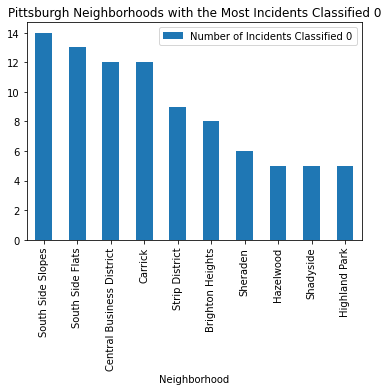

In [48]:
plt = Severity_sorted.iloc[:10].plot(kind='bar', x="Neighborhood", y="Number of Incidents Classified 0", title="Pittsburgh Neighborhoods with the Most Incidents Classified 0")

By comparing the bar graphs of the number of total incidents per neighborhood with the number of incidents classified as level 99, we can see that South Side Flats has the most number of total incidents, and one of the highest number of incidents ranked 99 in the hierarchy. You would think this means South Side Flats is one of the more dangerous places to live. However, the original dataset also used descriptions of the incident along with the hierarchy and location, and the descriptions show us that an incident that is 99 on the Hierarchy is actually least severe, and the incidents ranked 0 are most severe, which means South Side Slopes, with the highest number of level 0 incidents in Pittsburgh would probably be the most dangerous neighborhood to live. This makes sense, because the highest number of level 99 incidents in one neighborhood was 6016, while the highest number of level 0 incidents in one neighborhood was only 14, because it is a much more serious crime. And overall, the neighborhood with the smallest amount of total incidents was Mt. Oliver Boro, making it most likely the safest neighborhood to live based soley on the Police Incidents Metric.

In [49]:
police_incidents.query('INCIDENTNEIGHBORHOOD.str.startswith("Mt. Oliver Boro")')

,PK,CCR,HIERARCHY,INCIDENTTIME,INCIDENTLOCATION,CLEAREDFLAG,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTHIERARCHYDESC,OFFENSES,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y,geometry
4933,2811938,16029663,14,2016-02-18T07:50:00,"300 Block Brownsville RD Pittsburgh, PA 15210",N,Mt. Oliver Boro,3,CRIMINAL MISCHIEF,3304 Criminal Mischief.,4810,3,4,-79.98835946,40.4142895,None
5608,2812987,16033854,11,2016-02-24T12:00:00,"400 Block Brownsville RD Pittsburgh, PA 15210",N,Mt. Oliver Boro,3,THEFT OF SERVICES,9999 Miscellaneous Report (No Crime),4810,3,4,-79.98912555,40.41324466,None
7408,2817610,16044545,99,2016-03-12T04:30:00,"Liberty TUN & E Warrington AV Pittsburgh, PA 1...",N,Mt. Oliver Boro,3,NA,3743 Accidents Involving Damage to Attended Ve...,4810,,,0,0,None
9578,2825111,16061606,99,2016-04-01T07:00:00,"200 Block ANTHONY ST PITTSBURGH, PA 15210",N,Mt. Oliver Boro,3,NA,9999 (Misc. Crime),4810,,,-79.98647578,40.41224679,None
14915,2831789,16090396,10,2016-05-17T14:05:00,"700 Block Brownsville RD Pittsburgh, PA 15210",N,Mt. Oliver Boro,3,HARRASSMENT/THREAT/ATTEMPT/PHY,"2709(a)(1) Harassment by Physical Contact, or ...",4810,3,4,-79.99090163,40.4098476,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286633,3321072,22097333,15,2022-06-21T13:05:00,"90 Block Amanda AV Pittsburgh, PA 15211",N,Mt. Oliver Boro,3,WEAPONS-CARRY/POS-OTHER,8106 Shots Fired,4810,,,,,None
290204,3328108,22117602,10,2022-07-24T13:10:00,"600 Block Brownsville RD Pittsburgh, PA 15210",N,Mt. Oliver Boro,3,SIMPLE ASSAULT/INJURY,3503 Criminal Trespass / 2701(a)(3) Simple Ass...,4810,,,,,None
294849,3338250,22142983,99,2022-09-04T02:59:00,"400 Block Brownsville RD Mount Oliver, PA 15210",Y,Mt. Oliver Boro,OSC,NA,9999 Miscellaneous Report (No Crime),4810,3,5,-79.9891288578756,40.4132526275658,None
295344,3339144,22146639,6,2022-09-10T08:00:00,"700 Block Brownsville RD Pittsburgh, PA 15210",N,Mt. Oliver Boro,3,THEFT FROM AUTO,3304 Criminal Mischief. / 3921 Theft by Unlawf...,4810,3,5,-79.9906009292209,40.4098987771292,None


In [50]:
severity.query('Neighborhood.str.startswith("Mt. Oliver Boro")')

,Neighborhood,Number of Incidents Classified 99
0,Mt. Oliver Boro,33


In [51]:
Severity.query('Neighborhood.str.startswith("Mt. Oliver Boro")')

,Neighborhood,Number of Incidents Classified 0
0,Mt. Oliver Boro,0


In [52]:
incidents_agg.query('Neighborhood.str.startswith("Mt. Oliver Boro")')

,Neighborhood,Number of Incidents
0,Mt. Oliver Boro,94


We can see that there only 94 incidents in Mt. Oliver Total, while South Side Flats, with the highest, has 17 thousand, and there are no 0 level incidents in Mt. Oliver.

# **Metric #3: Number of Fire Incidents in the Neighborhood**

Analyzed by Steven Zheng

This dataset is a collection of the fire related incidents around the Pittsburgh area. The number of fire incidents can be used as a metric to measure the safety of the neighborhoods to ultimately find the "best" neighborhood in the Pittsburgh area.

In [2]:
#import pandas and geopandas
import pandas as pd
import geopandas as gpd

#create a dataframe from the csv file
df = pd.DataFrame(pd.read_csv("FireIncidents.csv"))
#dropping any null values
fireIncidents = df.dropna(subset=["neighborhood"])
fireIncidents.head(3)

,call_no,incident_type,type_description,address,alarm_time,alarms,primary_unit,census_tract,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
3,F170043431,131.0,Passenger vehicle fire,"1700 BLOCK BELLEAU DR, PITTSBURGH PA 15212",2017-05-31T08:39:47,0,231EN38,2509.0,Fineview,6.0,25.0,4.200325e+10,1.0,25.0,1.0,1-10,40.460303,-80.006980
4,F180021111,111.0,Building fire,"2400 BLOCK VILLAGE RD, PITTSBURGH PA 15205",2018-03-09T10:26:42,1,231EN31,2808.0,Fairywood,2.0,28.0,4.200356e+10,5.0,28.0,6.0,1-16,40.449009,-80.076607
5,F180021782,150.0,"Outside rubbish fire, Other","S 7TH ST & E CARSON ST, PITTSBURGH PA 15203",2018-03-12T09:13:28,0,231EN24,1702.0,South Side Flats,3.0,17.0,4.200317e+10,4.0,17.0,3.0,4-2,40.428618,-79.992239


We can see the dataset includes a description of the fire, time the alarmed went off, the primary unit on the site, and the neighborhood in which it happened.

Focusing on a specific column: type_description, we can find the type of fire that it was. Examples include: building fires, passenger vehicle fires, cooking fires, etc. We can classify the incidents based on the incident type id, the lower the number, the more severe the incident. As an example: a building fire has the value of 111, while a outside equipment fire has the value of 162. A building fire is arguably more severe than a equipment fire. We can analyze this dataset to determine the neighborhood with the least amount of severe incidents and determine the safest area to live in.

First, we should make a new dataframe as a way to hold our values later on, this specific one will match the neighborhood with its fire incident count.

In [3]:
#making a new dataframe to get rid of duplicates when sorting
incidentCount = pd.DataFrame(columns=["Neighborhood","Incident Count"])
incidentCount["Neighborhood"] = fireIncidents["neighborhood"]
incidentCount["Incident Count"] = 0

Now we can move on to finding the incident count of the individual neighborhoods, right now we are just focusing on the number of incidents, not the specific type of incidents.

In [4]:
#new dataframe that will be filled with the neighborhoods and incident counts
incidentCounter = pd.DataFrame(columns=["Neighborhood","Incident Count"])
#interates through every row in incidentCount and increments if the value in the neighborhood column matches the neighborhood in incidentCounter
for i, column in incidentCount.iterrows():
    neighborhood = column["Neighborhood"]
    
    if neighborhood in incidentCounter["Neighborhood"].values:
        incidentCounter.loc[incidentCounter["Neighborhood"] == neighborhood, "Incident Count"] +=1
    
    else:
        iCount = pd.DataFrame({'Neighborhood': [neighborhood], 'Incident Count' : [1]})
        incidentCounter = pd.concat([incidentCounter, iCount])
incidentCounter.head(3)
        

,Neighborhood,Incident Count
0,Fineview,46
0,Fairywood,23
0,South Side Flats,251


With the new dataframe filled in, we can now find the neighborhood with the most amount of incidents.

In [5]:
high = incidentCounter.sort_values("Incident Count", ascending = False)
high.head(5)

,Neighborhood,Incident Count
0,Carrick,280
0,Central Business District,255
0,South Side Flats,251
0,Squirrel Hill South,247
0,Hazelwood,238


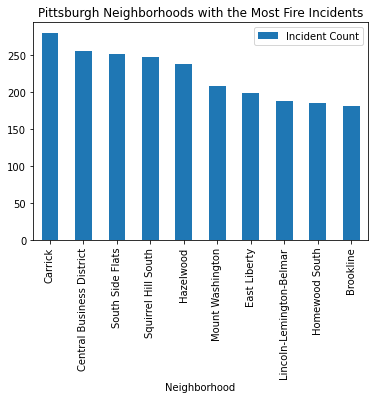

In [6]:
plot = high.iloc[:10].plot(kind = 'bar', x = "Neighborhood", y = "Incident Count", title = "Pittsburgh Neighborhoods with the Most Fire Incidents")

We can see that Carrick has the most amount of fire incidents, with Central Business District and South Side Flats not far behind.

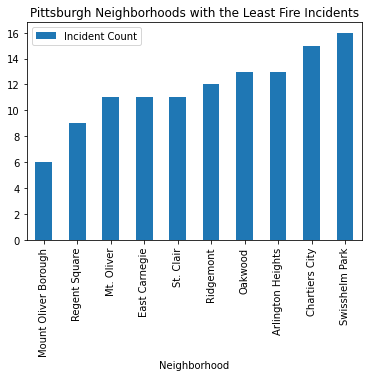

In [7]:
low = incidentCounter.sort_values("Incident Count", ascending = True)
plot = low.iloc[:10].plot(kind = 'bar', x = "Neighborhood", y = "Incident Count", title = "Pittsburgh Neighborhoods with the Least Fire Incidents")

Similar to the previous graph, this graph shows the amount of fire incidents, but differs as it shows the neighborhoods with the least amount. The neighborhood with the least amount is Mount Oliver Borough with 6.

Repeating the process of finding fire incidents, but this time we are focusing on the severity of the fire. Once again we create a new dataframe from the csv file and set the number of incidents to zero.

In [8]:
#making a new dataframe to put information into
fireC = pd.DataFrame(columns = ["Neighborhood", "Number of Severe Fires(111)"])
fireC["Neighborhood"] = fireIncidents["neighborhood"]
#this line of code acts like a filter, filtering out only the rows with the value of 111
fireC = fireIncidents[fireIncidents["incident_type"] == 111]

Now we can determine the neighborhood with the largest amount of severe fires

In [9]:
#same thing as before, new dataframe to fill up with severe fire incident counts
fireNumber = pd.DataFrame(columns = ["Neighborhood", "Number of Severe Fires(111)"])

#iterates through every row in fireC
for i, column in fireC.iterrows():
    neighborhood = column["neighborhood"]
    if neighborhood in fireNumber["Neighborhood"].values:
        fireNumber.loc[fireNumber["Neighborhood"] == neighborhood, "Number of Severe Fires(111)"]+=1 
    
    else:
        fire_row = pd.DataFrame({"Neighborhood": [neighborhood], "Number of Severe Fires(111)":[1]})
        fireNumber = pd.concat([fireNumber, fire_row])
sort_high = fireNumber.sort_values("Number of Severe Fires(111)", ascending = False)
sort_high.head(10)

,Neighborhood,Number of Severe Fires(111)
0,Carrick,80
0,Homewood North,59
0,Sheraden,58
0,Knoxville,56
0,Homewood South,49
0,Lincoln-Lemington-Belmar,48
0,Beltzhoover,45
0,Perry South,44
0,Mount Washington,43
0,Larimer,43


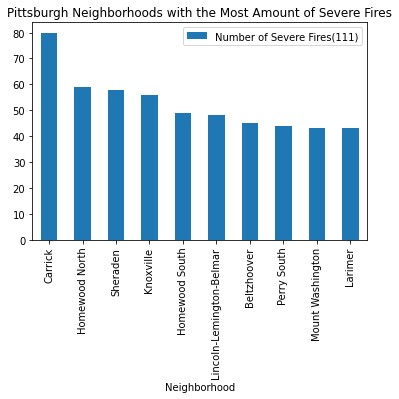

In [14]:
plt = sort_high.iloc[:10].plot(kind='bar', x= 'Neighborhood', y= 'Number of Severe Fires(111)',title= "Pittsburgh Neighborhoods with the Most Amount of Severe Fires")

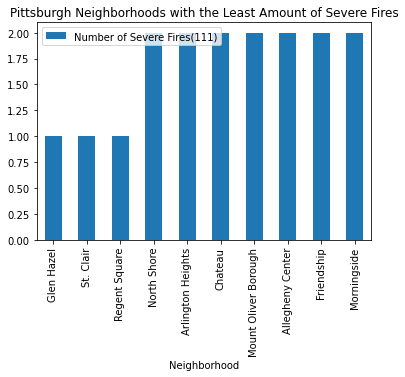

In [15]:
sort_low = fireNumber.sort_values("Number of Severe Fires(111)", ascending = True)
plt = sort_low.iloc[:10].plot(kind = 'bar',x = "Neighborhood", y = "Number of Severe Fires(111)", title = "Pittsburgh Neighborhoods with the Least Amount of Severe Fires")

Glancing at the bar graphs we can see that Glen Hazel has the least amount of severe fires, while Carrick has the greatest amount. If we look at the overall amount of fire incidents, Carrick is the neighborhood with the most incidents. This means that Carrick is the neighborhood most prone to having fire incidents and having severe fire incidents compared to the rest of the Pittsburgh neighborhoods. Glen Hazel is the neighborhood with the least amount of severe fires, however it not the neighborhood with the lowest amount of fire incidents, that would be Mount Oliver Borough. We can determine the overall safest neighborhood by searching for the incident count of Glen Hazel and the severe incident count of Mount Oliver Borough. Then we can compare the two to determine the safest neighborhood.

In [16]:
incidentCounter.query('Neighborhood.str.startswith("Glen Hazel")')

,Neighborhood,Incident Count
0,Glen Hazel,20


In [17]:
fireNumber.query('Neighborhood.str.startswith("Mount Oliver Borough")')

,Neighborhood,Number of Severe Fires(111)
0,Mount Oliver Borough,2


After a quick comparison, it can be stated that Mount Olvier Borough is the least flammable (safest) neighborhood in the Allegheny area with 2 severe fires incident and an overall incident count of 6. In comparison, Glen Hazel has 20 incident counts and only 1 severe fire incident.

# Conclusion:

**Valerie:** My personal favorite neighborhood is Squirrel Hill, and it ranked pretty low for police incidents and citations. However, the winning neighborhood was Mt. Oliver Borough. It had an extremely low number of citations, and zero severe ones. It had had 94 police incidents when the maximum was above 17,000, and Mt. Oliver had zero police incidents of the most severe level in their hierarchy. And finally, it a total of six fire incidents, with only two being severe. It was ranked lowest in total fire and police incidents, and it did not even rank at all for the citations dataset. In conclusion, it is the safest option for kids to live off campus according to our metrics, including the fact it is only about a 20 minute commute to campus. Conversly we did find an ultimate worst option, with South Side Flats having the most number of police incidents, the highest number of severe incidents, a large number of severe citations, and the second highest number of fire incidents.


**Steven:** After analyzing the three datasets and developing a different metric for each of the datasets, we have come to the conclusion that the overall safest neighborhood is Mount Oliver Borough. This was based on three different metrics, each based on a specific dataset. The first being the amount of citations, which are low level crimes, in which Mount Oliver Borough has a number of 4. The second metric is the number and severity of police incidents, in which Mount Oliver Borough has 94 police incidents, 0 classified as 0 and 33 classified as 99. Finally, the last metric is the amount of fire incidents in the neighborhood, which Mount Oliver Borough has 2 severe fire incidents and an overall incident count of 6. This results in Mount Oliver Borough being the safest option for a Pitt student to find a residence area as it has the lowest number of citations, police incidents, and fire incidents. My favorite neighborhood was also Squirrel Hill due to the amount of cuisines in the area, thankfully it also had a low count of fire incidents. It is a relatively safe area to live in.